In [2]:
# Heart Disease Prediction using Decision Tree Classifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Load data
df = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")

# Handle missing values
df["oldpeak"].fillna(df["oldpeak"].median(), inplace=True)

In [4]:
# Convert 'fbs' to int if it's boolean
if df["fbs"].dtype == bool:
    df["fbs"] = df["fbs"].astype(int)

# Encode categorical variables after converting them to string
categorical_cols = ["sex", "cp", "restecg", "exang", "slope", "thal"]
label_encoders = {}
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Convert to string to avoid mixed types
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Convert target to binary: 0 (no disease), 1 (disease)
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

In [5]:
# Define features and target
X = df.drop("num", axis=1)
y = df["num"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initial model training
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("Initial Classification Report:\n", classification_report(y_test, y_pred))
print("Initial ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Initial Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73        80
           1       0.79      0.75      0.77       102

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.76      0.75      0.75       182

Initial ROC-AUC Score: 0.7524509803921569


In [6]:
# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score from Grid Search:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Best F1 Score from Grid Search: 0.7976591057659492


In [7]:
# Evaluate tuned model
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
y_prob_best = best_clf.predict_proba(X_test)[:, 1]

print("Tuned Classification Report:\n", classification_report(y_test, y_pred_best))
print("Tuned ROC-AUC Score:", roc_auc_score(y_test, y_prob_best))

Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69        80
           1       0.76      0.73      0.74       102

    accuracy                           0.72       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.72      0.72      0.72       182

Tuned ROC-AUC Score: 0.7569240196078431


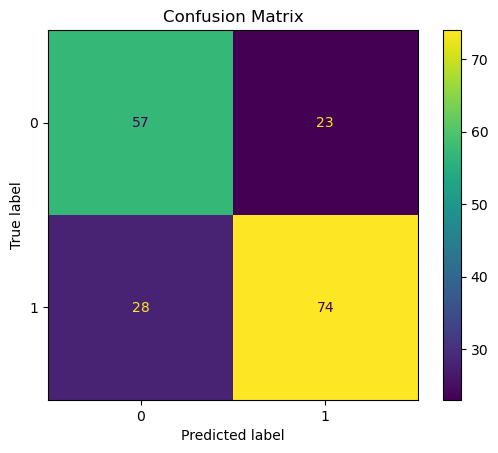

In [8]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

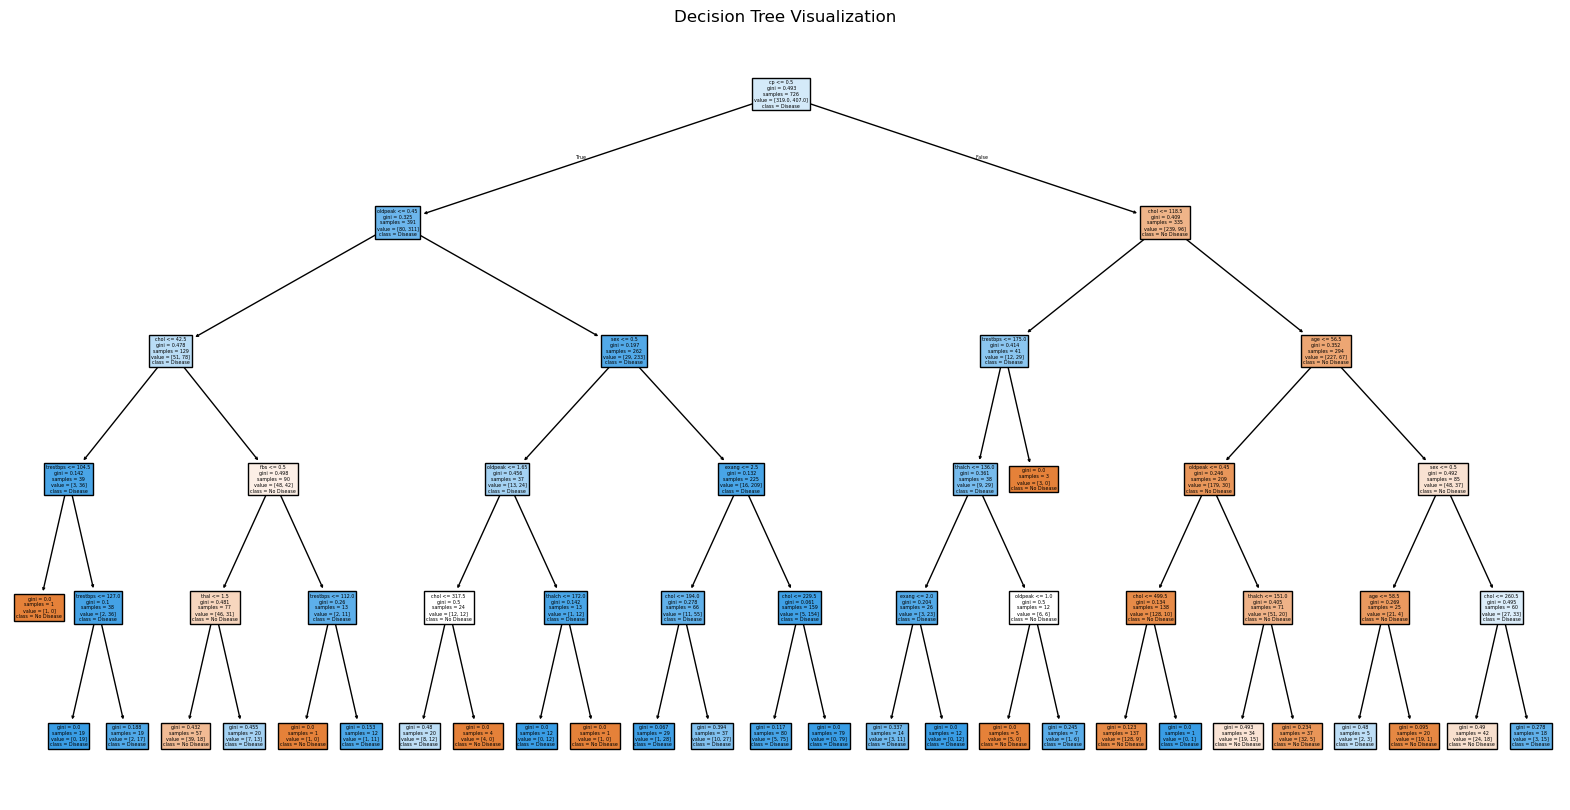

In [9]:
# Decision Tree plot
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

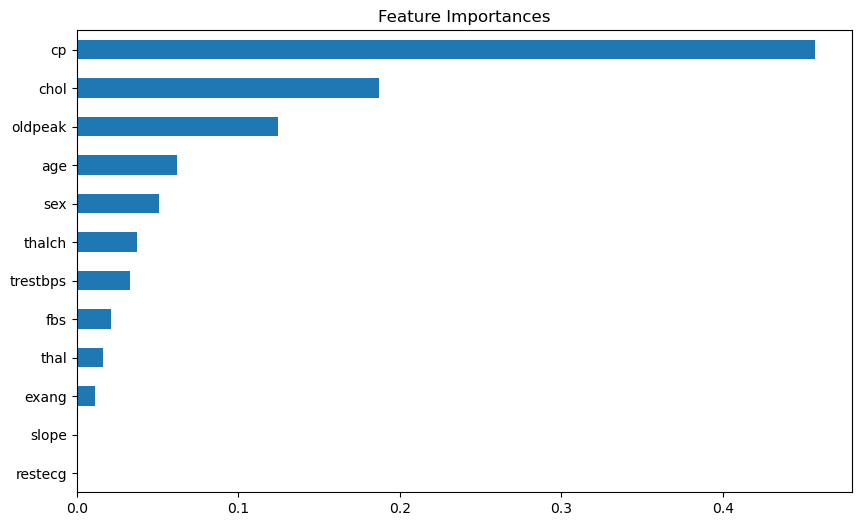

In [10]:
# Feature importance
importances = pd.Series(best_clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(10, 6), title="Feature Importances")
plt.show()

In [ ]:
#1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
#Common hyperparameters of decision tree models include max_depth, min_samples_split, min_samples_leaf, and max_features. max_depth limits the tree’s depth, reducing overfitting.
#min_samples_split and min_samples_leaf control the minimum number of samples required to split a node or be a leaf, impacting tree complexity. max_features limits the number of features considered for splits, helping reduce variance.

#2. What is the difference between the Label encoding and One-hot encoding?
# Label encoding assigns unique integers to each category, suitable for ordinal data. 
#One-hot encoding creates binary columns for each category, ideal for nominal data. 
#One-hot avoids implying ordinal relationships but increases dimensionality.